<a href="https://colab.research.google.com/github/SABA29SULTANA/SABA29SULTANA/blob/main/Mid_Course_Summative_Assignment_Numerical_Programming_in_Python_Analyze_it_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






## **Special Note** :- As the site keeps on updating its job postings therefore, the data make differ and you might also see changes in the dataframe and data visualization too.

# **Project name** - Navigating the Data Science Job Landscape







*   **Project Type** - Web Scraping and Data Visualization on Data Science Job Postings
*   **Project Member** - Saba Sultana



# **Project Summary**





*   The purpose of these project is to **analyse the market for data science jobs** that are available all over India and harvest vital insights that can help professionals, job seekers, and recruiters to utilize this data inorder to understand the dynamic shifts of the industry.
*   Here we are going to first **scrap data** for data science job postings that are available online on many sites like LinkedIn, Indeed, Naukri, Shine, etc. Then we are going to do few **data wrangling** operations to organize our data that can be readily used for **data visualization**.


*   At last we are going to end the project with a brief and suffice conclusion that gives an overall understanding of the project.






# **Problem Statement**

The primary objectives of this project is:


1.   To perform and understand **web scraping** mechanism inorder to gather data on data science job postings from online platforms.
2.   To perform various **data wrangling** operations like removing or replacing data, adding a new column, changing the datatype, etc.


3.   To analyse data and collect important insights with the help of charts, graphs, and visual representations (**data visualization**).






# ***Let's Begin !***

# **1.Web Scraping**

In [1]:
# Importing Libraries

from bs4 import BeautifulSoup
import requests
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Making a request to the website for multiple pages

page = 1   # Starting from page no. 1 of the job website
responses_list = []   # Empty list to store the response for all pages

while page != 50:

  # Website link from where the job postings are to be extracted
  url = f"https://www.shine.com/job-search/data-science-jobs-{page}?top_companies_boost=true&q=Data%20Science,&location=243&location=437&location=249&location=246&location=244&location=423&location=247&location=453&location=406&location=285&location=329&location=424&location=353&location=310&location=404&location=522&location=442&location=378&location=321&location=290&location=523&location=278&location=358&location=315&location=291&location=289&location=330&location=305&location=386&location=328&location=322&location=242&location=400&location=364&location=272"

  # Request sent to the site inorder to get the URL for the specific page
  response = requests.get(url)

  # Print the response code after getting the response of the request we sent
  print(f"The response that we got back from the URL for page no. {page} is {response.status_code}.")

  # Adding the response of each page to the list
  responses_list.append(response)

  # Incrementing the page by 1 to go to next page
  page += 1

The response that we got back from the URL for page no. 1 is 200.
The response that we got back from the URL for page no. 2 is 200.
The response that we got back from the URL for page no. 3 is 200.
The response that we got back from the URL for page no. 4 is 200.
The response that we got back from the URL for page no. 5 is 200.
The response that we got back from the URL for page no. 6 is 200.
The response that we got back from the URL for page no. 7 is 200.
The response that we got back from the URL for page no. 8 is 200.
The response that we got back from the URL for page no. 9 is 200.
The response that we got back from the URL for page no. 10 is 200.
The response that we got back from the URL for page no. 11 is 200.
The response that we got back from the URL for page no. 12 is 200.
The response that we got back from the URL for page no. 13 is 200.
The response that we got back from the URL for page no. 14 is 200.
The response that we got back from the URL for page no. 15 is 200.
The 

In [3]:
# Parsing through HTML for each page

soup_list = []   # Empty list to store all parsed data
html_list = []   # Empty list to store all HTML data

for i in responses_list:
  soup = BeautifulSoup(i.text,'html.parser')   # Parsing through the HTML data for each page
  soup_list.append(soup)

  html = soup.find_all('div')   # Extracting all the HTML data for label 'div' from each page
  html_list.append(html)

**Job** **Title**

In [4]:
# Finding Job Titles from each page

titles_list = []   # Empty list for storing all the job titles

for i in soup_list:

  # Obtaining the HTML data for job title
  req = i.select('div h2[itemprop = "name"]')

  # Getting the text from the HTML for each page
  titles = [r.text for r in req]

  # Removing spaces if any
  titles = [t.replace("  ", " ").strip() for t in titles]

  # Adding job titles of each page to a list for each job positing
  titles_list.append(titles)

# Flatten List using sum() function
titles_list = sum(titles_list, [])

# Print all the job titles
titles_list


['Hiring For Data Scientist',
 'Hiring For Data Scientist',
 'Hiring For Data Scientist',
 'Data Scientist',
 'Requirement for Data Analyst / Quality Check / Data Sci ...',
 'Staff Data Scientist & Team Lead',
 'Data scientist',
 'Data Scientist Associate Sr - NLP',
 'Data Science Engineer - EXP1',
 'Data Scientist - Bangalore',
 'Data Scientist',
 'Data Scientist',
 'Urgently need Data Scientist_Noida',
 'Urgently need Data Scientist_Delhi',
 'Urgently need Data Scientist_Bangalore',
 'Data Scientist Pune',
 'Data Scientist Noida',
 'Data Scientist Mumbai City',
 'Data Scientist Kolkata',
 'Data Scientist Hyderabad',
 'Lead Data Engineer',
 'Data Science Engineer',
 'for __Data Scientist Mumbai',
 'Gen AI- Developer',
 'Data Scientist',
 'Gen AI- Developer',
 'Data Scientist Project Manager',
 'Required for _Data Scientist Mumbai',
 'Hiring For Data Analyst',
 'Data Science Engineer',
 'Data Scientist',
 'Data Science for kochi',
 'Senior Data Scientist',
 'Data Scientist',
 'SENIOR D

**Company** **Name**

In [5]:
# Finding Company Names from each page

company_list = []   # Empty list for storing all the company names

for i in soup_list:

  # Obtaining the HTML data from the class where the company names are present
  req1 = soup.find_all('div', class_ = 'jobCard_jobCard_cName__mYnow')

  # Getting the text from the HTML for each page
  company = [r.text for r in req1]
  sub_string = 'Hiring'

  # Splitting the string on a sub_string and getting the first index (cleaning up names)
  company = [c.split(sub_string)[0] for c in company]

  # Removing spaces if any
  company = [c.strip().replace(".", "") for c in company]

  # Adding the company name to the list for each job positing
  company_list.append(company)

# Flatten List using sum() function
company_list = sum(company_list, [])

# Print all the company names
company_list

['IBM India Pvt Limited',
 'Augusta Infotech',
 'IBM India Pvt Limited',
 'JPMorgan',
 'IBM India Pvt Limited',
 'JPMorgan',
 'Morgan Stanley Advantage Services P',
 'Infosys Limited',
 'Morgan Stanley Advantage Services P',
 'Cognizant',
 'JPMorgan',
 'Morgan Stanley Advantage Services P',
 'Abbott Healthcare',
 'Cisco Systems, Inc',
 'Cisco Systems, Inc',
 'Bentley Systems India Pvt Ltd',
 'NTT Global Delivery Services Limite',
 'Informatica',
 'ZENFINET',
 'IBM India Pvt Limited',
 'IBM India Pvt Limited',
 'Augusta Infotech',
 'IBM India Pvt Limited',
 'JPMorgan',
 'IBM India Pvt Limited',
 'JPMorgan',
 'Morgan Stanley Advantage Services P',
 'Infosys Limited',
 'Morgan Stanley Advantage Services P',
 'Cognizant',
 'JPMorgan',
 'Morgan Stanley Advantage Services P',
 'Abbott Healthcare',
 'Cisco Systems, Inc',
 'Cisco Systems, Inc',
 'Bentley Systems India Pvt Ltd',
 'NTT Global Delivery Services Limite',
 'Informatica',
 'ZENFINET',
 'IBM India Pvt Limited',
 'IBM India Pvt Limite

**Job Location**

In [6]:
# Finding Job Locations from each page

location_list = []   # Empty list for storing all the job locations

for i in soup_list:

  # Obtaining the HTML data from the class where the job locations are present
  req2 = i.find_all('div', class_ = 'jobCard_jobCard_lists__fdnsc')

  # Obtaining all the text from the HTML
  location = [r.text for r in req2]

  # Cleaning up using regex
  location = [re.findall("Yrs?(.*)$", l)[0] for l in location]

  # Removing unnecessary text
  location = [l.replace("Mumbai City", "Mumbai") for l in location]
  location = ["All India" if ',' in l or '+' in l else l for l in location]

  # Adding the job location to the list for each job positing
  location_list.append(location)

# Flatten List using sum() function
location_list = sum(location_list, [])

# Print all the job locations
location_list

['All India',
 'All India',
 'All India',
 'All India',
 'All India',
 'Bangalore',
 'All India',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'Bangalore',
 'All India',
 'Noida',
 'Delhi',
 'Bangalore',
 'Pune',
 'Noida',
 'Mumbai',
 'Kolkata',
 'Hyderabad',
 'Noida',
 'Bangalore',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Pune',
 'Hyderabad',
 'Mumbai',
 'All India',
 'Bangalore',
 'All India',
 'Kochi',
 'All India',
 'Bangalore',
 'Mumbai',
 'Gurugram',
 'Bangalore',
 'Pune',
 'Mumbai',
 'Kolkata',
 'Kolkata',
 'Hyderabad',
 'Gurugram',
 'Chennai',
 'Bangalore',
 'Mumbai',
 'All India',
 'All India',
 'All India',
 'Bangalore',
 'Delhi',
 'Chennai',
 'Bangalore',
 'Bangalore',
 'Pune',
 'Bangalore',
 'Pune',
 'Pune',
 'Pune',
 'Bangalore',
 'Bangalore',
 'Pune',
 'Bangalore',
 'Bangalore',
 'Chennai',
 'Bangalore',
 'All India',
 'Noida',
 'Bangalore',
 'Noida',
 'All India',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Mumbai',
 'Bangalore',
 'Bangalore',
 'Mumbai',
 'Ban

**Job** **Experience**

In [7]:
# Finding Job Experience requried from each page

experience_list = []   # Empty list for storing all the job experience data

for i in soup_list:

  # Obtaining the HTML data from the class where the job experience is present
  req3 = i.find_all('div', class_ = 'jobCard_jobCard_lists__fdnsc')

  # Obtaining all the text from the HTML
  experience = [r.text for r in req3]

  # Cleaning up using regex
  experience = [re.findall("^(.*) Yrs?", e)[0] for e in experience]

  # Removing unnecessary text
  experience = [e.replace(">", "") for e in experience]

  # Adding the job experience to the list for each job positing
  experience_list.append(experience)

# Flatten List using sum() function
experience_list = sum(experience_list, [])

# Print all the job experience requried
experience_list

['0 to 4',
 '0 to 4',
 '0 to 4',
 '3 to 6',
 '5 to 10',
 '8 to 12',
 '6 to 11',
 '3 to 5',
 '0 to 4',
 '4 to 6',
 '0 to 4',
 '3 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '6 to 9',
 '1 to 6',
 '2 to 7',
 '0 to 2',
 '5 to 10',
 '0 to 2',
 '4 to 9',
 '2 to 7',
 '0 to 4',
 '1 to 6',
 '3 to 5',
 '4 to 9',
 '5 to 10',
 '0 to 4',
 '10 to 13',
 '4 to 9',
 '4 to 9',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '5 to 10',
 '4 to 6',
 '10 to 15',
 '7 to 12',
 '3 to 6',
 '4 to 9',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '0 to 2',
 '0 to 2',
 '3 to 5',
 '1 to 3',
 '5 to 10',
 '0 to 1',
 '22 to 24',
 '5 to 7',
 '4 to 7',
 '5 to 7',
 '0 to 2',
 '4 to 6',
 '7 to 13',
 '0 to 2',
 '8 to 12',
 '2 to 3',
 '8 to 12',
 '0 to 1',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 6',
 '4 to 8',
 '7 to 10',
 '2 to 7',
 '5 to 7',
 '5 to 7',
 '8 to 10',
 '6 to 8',
 '4 to 6',
 '5 to 10',
 '2 to 4',
 '0 to 1',
 '8 to 10',


In [8]:
# Creating a new list for job experience that contains only the initial experience value

new_experience_list = []   # Creating a new list to store the 0th index of the string as experience

for e in experience_list:
  new_experience_list.append(e[0])   # Adding the initial experience value (0th Index) to the list

# Print all the 0th Index of job experience requried
new_experience_list


['0',
 '0',
 '0',
 '3',
 '5',
 '8',
 '6',
 '3',
 '0',
 '4',
 '0',
 '3',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '6',
 '1',
 '2',
 '0',
 '5',
 '0',
 '4',
 '2',
 '0',
 '1',
 '3',
 '4',
 '5',
 '0',
 '1',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '5',
 '4',
 '1',
 '7',
 '3',
 '4',
 '4',
 '4',
 '4',
 '0',
 '0',
 '3',
 '1',
 '5',
 '0',
 '2',
 '5',
 '4',
 '5',
 '0',
 '4',
 '7',
 '0',
 '8',
 '2',
 '8',
 '0',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '7',
 '2',
 '5',
 '5',
 '8',
 '6',
 '4',
 '5',
 '2',
 '0',
 '8',
 '2',
 '5',
 '8',
 '8',
 '8',
 '0',
 '7',
 '1',
 '4',
 '5',
 '0',
 '7',
 '7',
 '8',
 '0',
 '1',
 '5',
 '4',
 '0',
 '5',
 '7',
 '4',
 '4',
 '4',
 '4',
 '4',
 '0',
 '5',
 '5',
 '0',
 '5',
 '4',
 '4',
 '1',
 '1',
 '6',
 '0',
 '5',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '5',
 '0',
 '1',
 '3',
 '1',
 '0',
 '7',
 '0',
 '5',
 '3',
 '6',
 '1',
 '4',
 '5',
 '0',
 '2',
 '6',
 '0',
 '0',
 '5',
 '5',
 '1',
 '4',
 '4',
 '5',
 '0',
 '0',
 '6',
 '6',
 '3',
 '3',
 '2',
 '3',
 '5'

**Job Vacancies**

In [9]:
# Finding Number of vacancies available from each page

vacancies_list = []   # Empty list for storing all the vacancies related data

for i in soup_list:

  # Obtaining the HTML data from the class where the no. of vacancies are present
  req4 = soup.find_all('ul', class_='jobCard_jobCard_jobDetail__jD82J')

  # Getting the text from the HTML
  vacancies = [r.text for r in req4 ]

  # Cleaning up the data using regex
  vacancies = [int(re.findall(r'\d+', v)[0]) if re.findall(r'\d+', v) else 1 for v in vacancies]

  # Adding the no. of vacancies to the list for each job positing
  vacancies_list.append(vacancies)

# Flatten List using sum() function
vacancies_list = sum(vacancies_list, [])

# Print all the job vacancies available
vacancies_list


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [10]:
# Let's put together all the data extracted from HTML into main DATAFRAME

job_data = {'Titles': titles_list, 'Company Name': company_list, 'Job Location': location_list, 'Total Vacancies': vacancies_list, 'Experience': new_experience_list}

df = pd.DataFrame(job_data)   # Pandas Dataframe

df


,Titles,Company Name,Job Location,Total Vacancies,Experience
0,Hiring For Data Scientist,IBM India Pvt Limited,All India,1,0
1,Hiring For Data Scientist,Augusta Infotech,All India,1,0
2,Hiring For Data Scientist,IBM India Pvt Limited,All India,1,0
3,Data Scientist,JPMorgan,All India,1,3
4,Requirement for Data Analyst / Quality Check /...,IBM India Pvt Limited,All India,1,5
...,...,...,...,...,...
975,"Manager, Colleague Success Services, APAC (HR ...",Bentley Systems India Pvt Ltd,Pune,1,5
976,SAP Sr BODS Developer,NTT Global Delivery Services Limite,All India,1,1
977,QA Engineer,Informatica,Bangalore,1,3
978,Immediate Hiring For QlikView DeveloperBangalore,ZENFINET,Bangalore,1,7


# **2.Data Wrangling**

In [11]:
# Dataset First Look
# First 5 rows of the dataset

df.head()


,Titles,Company Name,Job Location,Total Vacancies,Experience
0,Hiring For Data Scientist,IBM India Pvt Limited,All India,1,0
1,Hiring For Data Scientist,Augusta Infotech,All India,1,0
2,Hiring For Data Scientist,IBM India Pvt Limited,All India,1,0
3,Data Scientist,JPMorgan,All India,1,3
4,Requirement for Data Analyst / Quality Check /...,IBM India Pvt Limited,All India,1,5


In [12]:
# Dataset Rows & Columns count

print(df.shape)
print(f"Total number of Rows: {len(df)}")
print(f"Total number of Columns: {len(df.columns)}")


(980, 5)
Total number of Rows: 980
Total number of Columns: 5


In [13]:
# Dataset Info
# First hand info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Titles           980 non-null    object
 1   Company Name     980 non-null    object
 2   Job Location     980 non-null    object
 3   Total Vacancies  980 non-null    int64 
 4   Experience       980 non-null    object
dtypes: int64(1), object(4)
memory usage: 38.4+ KB


In [14]:
# Dataset Columns
# List of columns in the data frame

df.columns


Index(['Titles', 'Company Name', 'Job Location', 'Total Vacancies',
       'Experience'],
      dtype='object')

In [15]:
# Check unique values for each variable (columns)

print("Number of uniques values for each column is:\n")
for i in df.columns.tolist():
  print(f"{i} ({df[i].nunique()}) : {df[i].unique()}\n")


Number of uniques values for each column is:

Titles (741) : ['Hiring For Data Scientist' 'Data Scientist'
 'Requirement for Data Analyst / Quality Check / Data Sci ...'
 'Staff Data Scientist & Team Lead' 'Data scientist'
 'Data Scientist Associate Sr - NLP' 'Data Science Engineer - EXP1'
 'Data Scientist - Bangalore' 'Urgently need Data Scientist_Noida'
 'Urgently need Data Scientist_Delhi'
 'Urgently need Data Scientist_Bangalore' 'Data Scientist Pune'
 'Data Scientist Noida' 'Data Scientist Mumbai City'
 'Data Scientist Kolkata' 'Data Scientist Hyderabad' 'Lead Data Engineer'
 'Data Science Engineer' 'for __Data Scientist Mumbai' 'Gen AI- Developer'
 'Data Scientist Project Manager' 'Required for _Data Scientist Mumbai'
 'Hiring For Data Analyst' 'Data Science for kochi'
 'Senior Data Scientist' 'SENIOR DATA SCIENTIST ( DEEP LEARNING/ NLP)'
 'Data Science for Gurugram'
 'Senior Consultant/Principal - Business Consulting (AILA ...'
 'Urgently need Data Scientist_Pune'
 'Urgently nee

In [16]:
# Total number of rows before removing duplicates
print(f"Total number of rows before removing any duplicate rows are: {df.shape}\n")

# Number of duplicate rows
print(f"Number of duplicate rows in the dataset are: {df[df.duplicated()].shape}\n")

# Removing duplicate rows
df.drop_duplicates(inplace = True)

# Total number of rows after removing duplicates
print(f"Total number of rows after removing duplicate rows are: {df.shape}")


Total number of rows before removing any duplicate rows are: (980, 5)

Number of duplicate rows in the dataset are: (26, 5)

Total number of rows after removing duplicate rows are: (954, 5)


In [17]:
# Checking if their are any missing values

df.isnull().sum()

Titles             0
Company Name       0
Job Location       0
Total Vacancies    0
Experience         0
dtype: int64

In [18]:
# Changing datatype of the column 'Experience'

df['Experience'] = df['Experience'].astype('int64')



In [19]:
# Adding new column

# Creating a column known as 'Vacancy_Category' by performing a nested condition on column 'Total Vacancies'
df['Vacancy_Category'] = np.where(df['Total Vacancies'] == 1, 'Single Vacancy', np.where((df['Total Vacancies'] > 1) & (df['Total Vacancies'] < 10), 'Medium Vacancies', 'High Vacancies'))

# Creating a column known as 'Experience_Category' by performing a nested condition on column 'Experience'
df['Experience_Category'] = np.where(df['Experience'] == 0, 'Fresher', np.where((df['Experience'] > 0) & (df['Experience'] < 6), 'Medium Experience', 'High Experience'))



In [20]:
# Let's see the dataset after adding new columns

df.head()

,Titles,Company Name,Job Location,Total Vacancies,Experience,Vacancy_Category,Experience_Category
0,Hiring For Data Scientist,IBM India Pvt Limited,All India,1,0,Single Vacancy,Fresher
1,Hiring For Data Scientist,Augusta Infotech,All India,1,0,Single Vacancy,Fresher
3,Data Scientist,JPMorgan,All India,1,3,Single Vacancy,Medium Experience
4,Requirement for Data Analyst / Quality Check /...,IBM India Pvt Limited,All India,1,5,Single Vacancy,Medium Experience
5,Staff Data Scientist & Team Lead,JPMorgan,Bangalore,1,8,Single Vacancy,High Experience


# **3.Data Visualization**

**Chart-1**: What are different job locations? and Which location is often seen in job postings?

In [21]:
# Let's find out different job locations and their total count in percentage(%) (Top 10)

job_locations = df['Job Location'].value_counts(normalize=True).reset_index().head(10)
job_locations.columns = ['Locations', 'Total_Count_in_%']
job_locations['Total_Count_in_%'] = round(100 * job_locations['Total_Count_in_%'], 2)
job_locations

,Locations,Total_Count_in_%
0,Bangalore,35.64
1,All India,14.15
2,Pune,10.90
3,Mumbai,9.85
4,Hyderabad,7.97
5,Noida,5.45
6,Chennai,5.35
7,Gurugram,3.35
8,Delhi,2.10
9,Kolkata,1.36


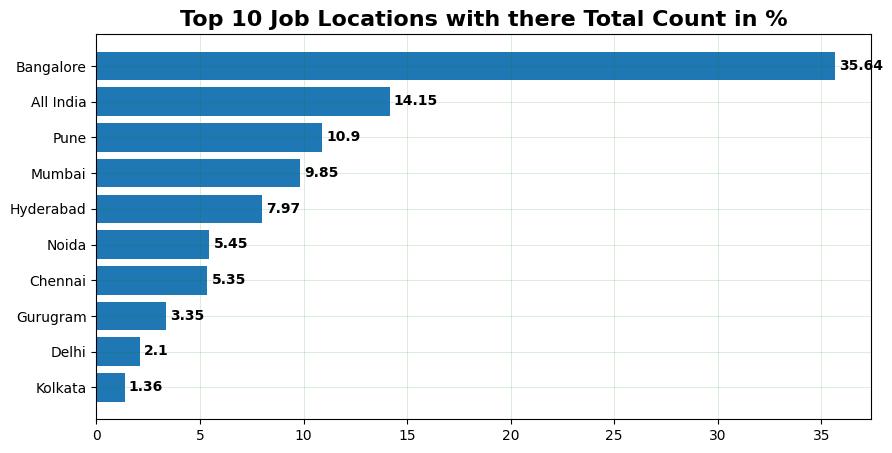

In [22]:
# Let's visualize these information using horizontal bar graph

# Figure Size
fig, ax = plt.subplots(figsize = (10, 5))

# Horizontal Bar Plot
ax.barh(job_locations.Locations, job_locations['Total_Count_in_%'])

# Add x, y gridlines
ax.grid(color ='green', linestyle ='-', linewidth = 0.5, alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color = 'black')

# Add Plot Title
ax.set_title('Top 10 Job Locations with there Total Count in %', fontweight = "bold", size = 16)

# Show Plot
plt.show()

What is/are the insight(s) found from the chart?



*   As we can see from above, most of the locations present in job postings are from '**Bangalore**' (**37%**). That is why, Bangalore is known as the '**Silicon Valley of India**' because it is the India's leading software exporter as well as a major semiconductor hub.


*   Second comes '**All India**' with **13%** that means, the candidate applying for the job, if selected, can be posted anywhere in India wherever it's branches are present.



*   Thrid comes '**Mumbai**' & '**Pune**' with **11%** & **9%** respectively. Mumbai & Pune are two biggest and major metropolitan cities of Maharashtra and India respectively. Mumbai is known as '**Financial Capital of India**' and Pune for '**Queen of the Deccan**' due to its rich culture and heritage.
*   The least of all the job locations present in job postings from above chart are '**Delhi**' & '**Kolkata**' with 1.5% & 1% respectively.





**Chart-2**: What different companies are present in the dataset? and Which companies has the large no. of job postings?

In [23]:
# Let's find out different company names and their total count in percentage(%)

company_names = df['Company Name'].value_counts(normalize=True).reset_index()
company_names.columns = ['Company_Name', 'Total_Count_in_%']
company_names['Total_Count_in_%'] = round(100 * company_names['Total_Count_in_%'], 2)
company_names

,Company_Name,Total_Count_in_%
0,IBM India Pvt Limited,19.39
1,JPMorgan,14.88
2,Morgan Stanley Advantage Services P,14.88
3,"Cisco Systems, Inc",10.17
4,Augusta Infotech,5.14
5,Infosys Limited,5.14
6,Cognizant,5.14
7,Bentley Systems India Pvt Ltd,5.14
8,NTT Global Delivery Services Limite,5.14
9,Abbott Healthcare,5.03


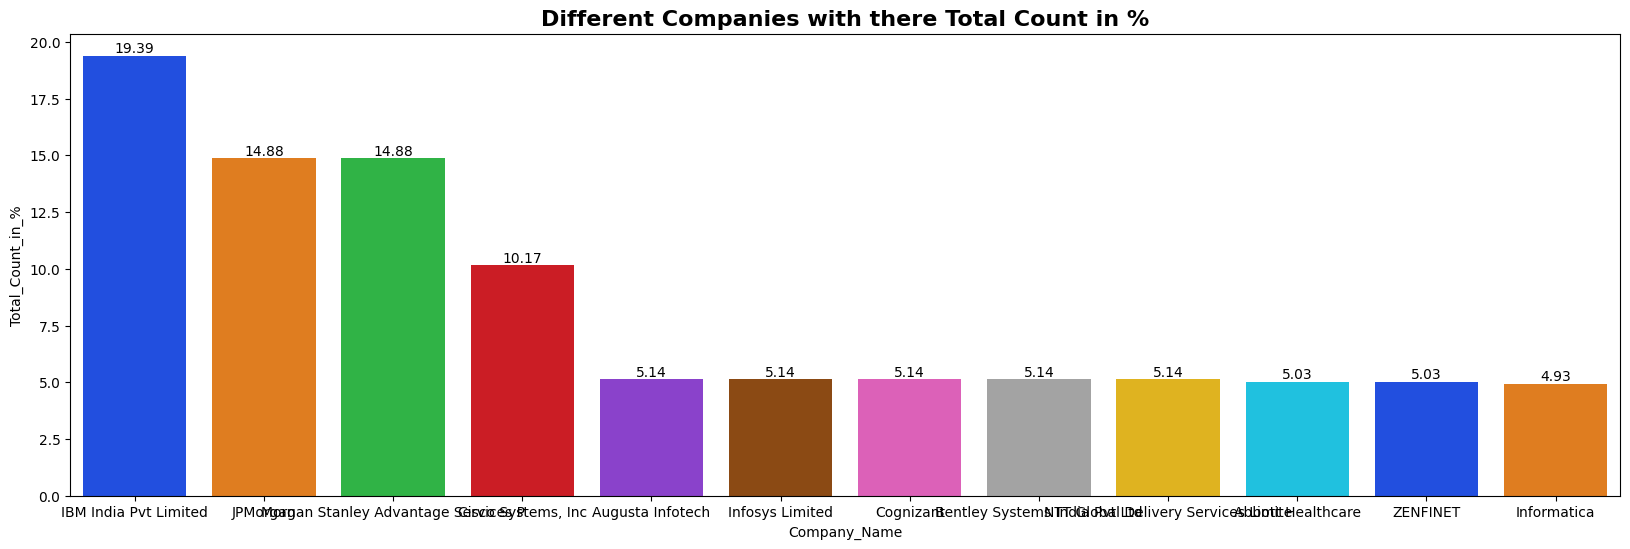

In [24]:
# Let's visualize the above data with the help of bar chart

# Set the size of the chart
plt.figure(figsize = (20,6))

# Use sns barplot to plot
ax = sns.barplot(x = 'Company_Name', y = 'Total_Count_in_%', data = company_names, errwidth = 0, palette = 'bright')

# Simply assign the bar values to each bar
ax.bar_label(ax.containers[0])

# Add title to the chart
plt.title('Different Companies with there Total Count in %', fontweight = "bold", size = 16)

# Display plot
plt.show()


What is/are the insight(s) found from the chart?



*   Company named '**Accenture**' has highest no. of job postings that stands for **44%** of all job postings present in the dataset.
*   Founded in 1989, Accenture is a global professional services company that specialises in strategy and consulting. And it is also the largest consulting firm in the world in terms of employee numbers.


*   Company name '**Fiserv India Pvt Ltd**' is on second spot with **25%** share and '**GFL RECRUITMENT PRIVATE LIMITED**' is on thrid spot with **15.5%** of total share.


*   Then comes **Siemens Limited, Bajaj Finserv Lending Ltd**, and **Mercede** with 5% job positing share each.

*   Most of these companies are either consulting firms, service based companies, or companies that provide end-to-end fin-tech products or services.








**Chart-3**: How much experience is required while applying for job? and What are different experience categories?

***How much experience is required while applying for job***?

In [25]:
# Let's first find out job experience requried (in numbers) and their total count in percentage(%)

job_experience = df['Experience'].value_counts(normalize=True).reset_index()
job_experience.columns = ['Experience_Number', 'Total_Count_in_%']
job_experience['Total_Count_in_%'] = round(100 * job_experience['Total_Count_in_%'], 2)
job_experience


,Experience_Number,Total_Count_in_%
0,0,20.65
1,4,14.05
2,3,13.73
3,2,13.00
4,5,12.47
5,1,9.75
6,6,7.23
7,8,5.66
8,7,3.46


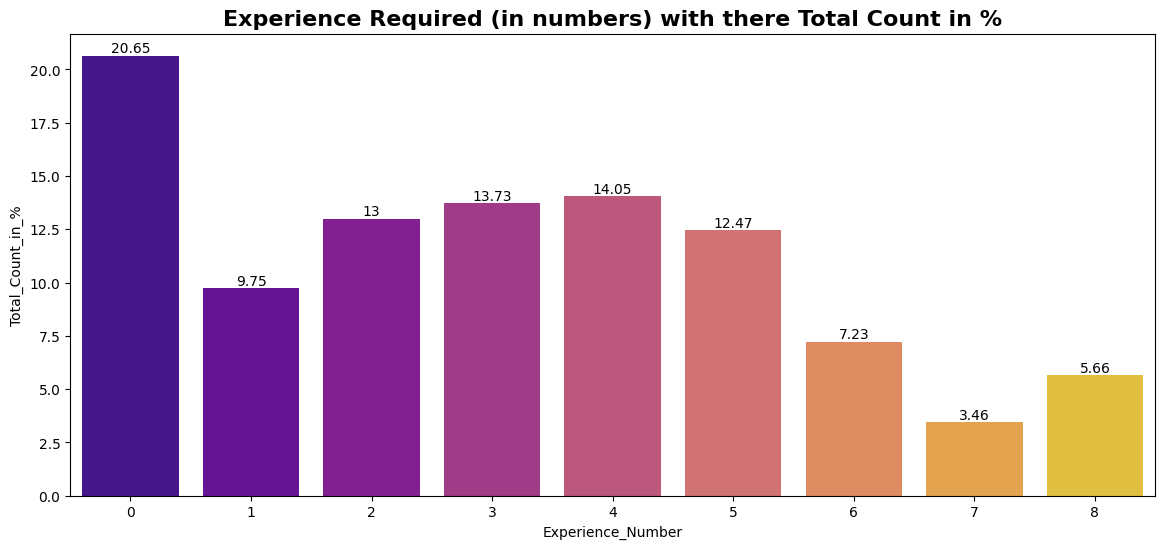

In [26]:
# Let's visualize the above data with the help of bar graph

# Set the size of the chart
plt.figure(figsize = (14,6))

# Use sns barplot to plot
ax = sns.barplot(x = 'Experience_Number', y = 'Total_Count_in_%', data = job_experience, errwidth = 0, palette = 'plasma')

# Simply assign the bar values to each bar
ax.bar_label(ax.containers[0])

# Add title to the chart
plt.title('Experience Required (in numbers) with there Total Count in %', fontweight = "bold", size = 16)

# Display plot
plt.show()

Experience_Number:

*   0 -> No Experience / Fresher,
*   1-> 1 year of Experience,


*   2 -> 2 years of Experience,
*   3 -> 3 years of Experience, etc.







***What are different experience categories?***

In [27]:
# Now let's find out different job experience categories and their total count in percentage(%)

job_experience_categories = df['Experience_Category'].value_counts(normalize=True).reset_index()
job_experience_categories.columns = ['Experience_Categories', 'Total_Count_in_%']
job_experience_categories['Total_Count_in_%'] = round(100 * job_experience_categories['Total_Count_in_%'], 2)
job_experience_categories

,Experience_Categories,Total_Count_in_%
0,Medium Experience,63.00
1,Fresher,20.65
2,High Experience,16.35


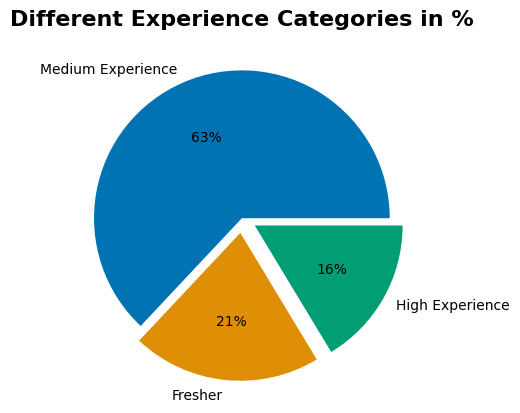

In [28]:
# Let's see this data using Pie Chart

# Declaring exploding pie
explode = [0, 0.1, 0.1]

# Define Seaborn color palette to use
palette_color = sns.color_palette('colorblind')

# Plotting data on chart
plt.pie(job_experience_categories['Total_Count_in_%'], labels = job_experience_categories['Experience_Categories'], colors = palette_color, explode = explode, autopct = '%.0f%%')

# Add title to the chart
plt.title('Different Experience Categories in %', fontweight = "bold", size = 16)

# Displaying chart
plt.show()

Experience_Categories:



*   '**Fresher**' -> Zero Experience
*   '**Medium Experience**' -> 1-6 years of Experience

*   '**High Experience**' -> More than 6 years of Experience.

What is/are the insight(s) found from the chart?

*   First chart - ***Job Experience Requried*** in numbers (Bar Chart):

> In first chart what we can grasp is that, most of the job openings are for either Fresher that have **zero** (0) **years** of experience or candidate with **2/3 years** of experience.

> Most of the MNC's opt for Freashers because they often have qualities and skills, such as a strong educational background, a willingness to learn, innovative ideas, and potential for growth.

> And least job positings are expected for those candidates that have 9 or more than **9 years** of experience.

*   Second chart - ***Job Experience Categories*** (Pie Chart):

> From second chart what we can discover is that, most of the companies prefer those candidates that belong to '**Medium Experience**' category that means experience between 1 to 6 years of range.

> If we divide the above chart into two categories then:

1.   **Fresher** => **16%**, and
2.   **Experienced** => **84%**.


> Most of the companies prefer employees with minimum experience because of the skills, qualities and versatility that one has to adapt to changes. An experienced individual may adjust to changes within an organization with little guidance from their supervisors.



















**Chart-4**: Which company has how may vacancies available? and What are different vacancy categories? and Which Top 10 cities have the highest vacancies?


***Which company has how may vacancies available?***

In [29]:
# First let's find out how many vacancies are available for each company

job_vacancies = df.groupby(['Company Name']).mean()['Total Vacancies'].astype(int).reset_index()
job_vacancies

<ipython-input-29-af1395c4e676>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  job_vacancies = df.groupby(['Company Name']).mean()['Total Vacancies'].astype(int).reset_index()


,Company Name,Total Vacancies
0,Abbott Healthcare,1
1,Augusta Infotech,1
2,Bentley Systems India Pvt Ltd,1
3,"Cisco Systems, Inc",1
4,Cognizant,1
5,IBM India Pvt Limited,1
6,Informatica,1
7,Infosys Limited,1
8,JPMorgan,1
9,Morgan Stanley Advantage Services P,1


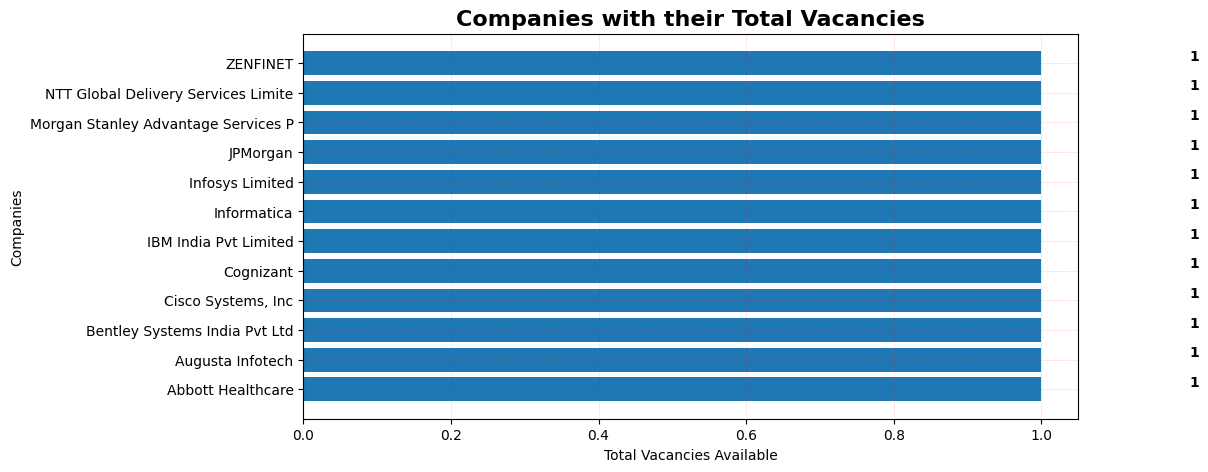

In [30]:
# Let's visualize these data using horizontal bar graph

# Figure Size
fig, ax = plt.subplots(figsize = (10, 5))

# Horizontal Bar Plot
ax.barh(job_vacancies['Company Name'], job_vacancies['Total Vacancies'])

# Add x, y gridlines
ax.grid(color ='red', linestyle ='--', linewidth = 0.5, alpha = 0.2)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight = 'bold', color = 'black')

# Add Plot Title
ax.set_title('Companies with their Total Vacancies', fontweight = "bold", size = 16)

# Set axes and title label
plt.xlabel('Total Vacancies Available')
plt.ylabel('Companies')

# Show Plot
plt.show()


***What are different vacancy categories?***

In [31]:
# Now let's find out different vacancy categories along with their total count in percentage(%)

job_vacancies_categories = df['Vacancy_Category'].value_counts(normalize=True).reset_index()
job_vacancies_categories.columns = ['Vacancy_Categories', 'Total_Count_in_%']
job_vacancies_categories['Total_Count_in_%'] = round(100 * job_vacancies_categories['Total_Count_in_%'], 2)
job_vacancies_categories

,Vacancy_Categories,Total_Count_in_%
0,Single Vacancy,100.0


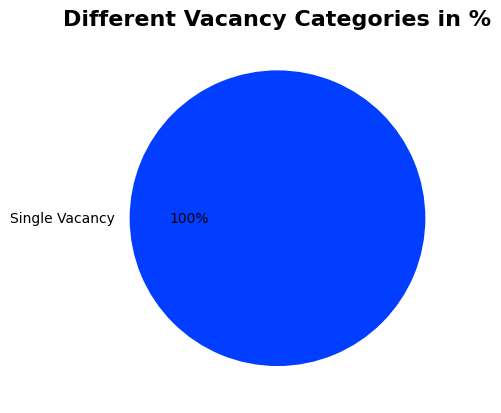

In [32]:
# Let's visualize this data using Pie Chart

# Define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# Plotting data on chart
plt.pie(job_vacancies_categories['Total_Count_in_%'], labels = job_vacancies_categories['Vacancy_Categories'], colors = palette_color, autopct = '%.0f%%')

# Add title to the chart
plt.title('Different Vacancy Categories in %', fontweight = "bold", size = 16)

# Displaying chart
plt.show()

***Which Top 10 cities have the highest vacancies?***

In [33]:
# Now let's find out total vacancies available for each city along with their total count

job_vacancies_cities = df.groupby(['Job Location']).count()['Total Vacancies'].astype(int).reset_index().sort_values(by = ['Total Vacancies'], ascending = False)
job_vacancies_cities


,Job Location,Total Vacancies
2,Bangalore,340
1,All India,135
18,Pune,104
15,Mumbai,94
9,Hyderabad,76
17,Noida,52
4,Chennai,51
8,Gurugram,32
6,Delhi,20
13,Kolkata,13


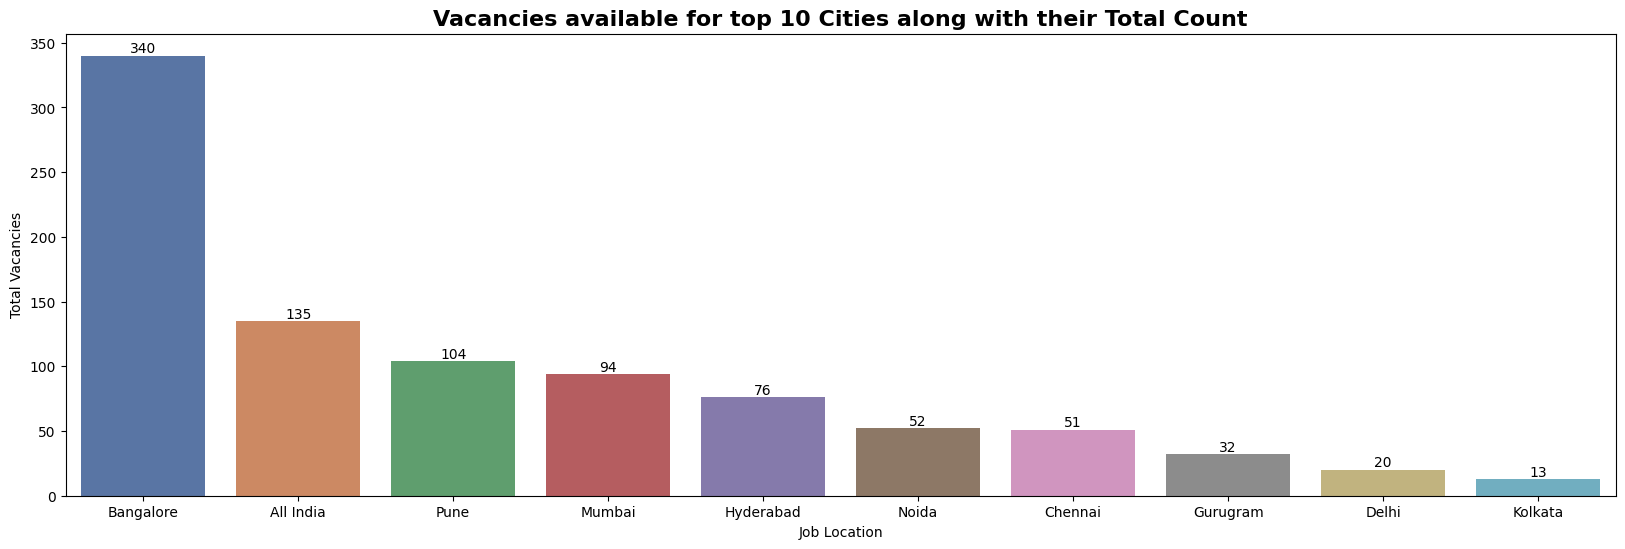

In [34]:
# Finally let's visualize the above data with the help of bar graph

# Set the size of the chart
plt.figure(figsize = (20,6))

# Use sns barplot to plot
ax = sns.barplot(x = 'Job Location', y = 'Total Vacancies', data = job_vacancies_cities.head(10), errwidth = 0, palette = 'deep')

# Simply assign the bar values to each bar
ax.bar_label(ax.containers[0])

# Add title to the chart
plt.title('Vacancies available for top 10 Cities along with their Total Count', fontweight = "bold", size = 16)

# Display plot
plt.show()


What is/are the insight(s) found from the chart?



*   From 1st graph - ***Total vacancies for each company*** (Horizontal bar graph):



> Company named '**QUISCON BIOTECH**' & '**Clyent Technologies**' have highest vacancies available.

> Companies with least vacancies are '**Alpine Manpower Services**', '**Manish Enterprises**', and '**Merck Ltd**' have 1 vacancy each.






*   From 2nd graph - ***Different job vacancy categories*** (Pie graph):

> From above graph what we can conclude is that, most of the job postings have '**Single Vacancy**' that means only one candidate will be selected for the requried position.



> And job postings that have more than one vacancy available account for 21% of the total share.

1.   **Medium Vacancy** -> 10%
2.   **High Vacancy** -> 11%


*   From 3rd graph - ***Vacancies available city-wise*** (Bar graph):


> Bangalore' has the most no. of job vacancies available followed by **'Pune', 'Mumbai', 'Hyderbad', 'Gurugram', and 'Chennai''**.

1.   These cities are mostly called the '**Tech Cities of India**' and many tech-savvy candidates prefer these cities for their tech career.
















**Chart-5**: Which company prefer what amount of average experience from candidates?

In [35]:
# Let's find out average experience requried in different experience categories for each company

company_experience = df.groupby(['Company Name', 'Experience_Category']).mean()['Experience'].astype(int).reset_index()
company_experience

<ipython-input-35-1fed308ad018>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  company_experience = df.groupby(['Company Name', 'Experience_Category']).mean()['Experience'].astype(int).reset_index()


,Company Name,Experience_Category,Experience
0,Abbott Healthcare,Fresher,0
1,Abbott Healthcare,High Experience,7
2,Abbott Healthcare,Medium Experience,3
3,Augusta Infotech,Fresher,0
4,Augusta Infotech,High Experience,7
5,Augusta Infotech,Medium Experience,3
6,Bentley Systems India Pvt Ltd,Fresher,0
7,Bentley Systems India Pvt Ltd,High Experience,6
8,Bentley Systems India Pvt Ltd,Medium Experience,3
9,"Cisco Systems, Inc",Fresher,0


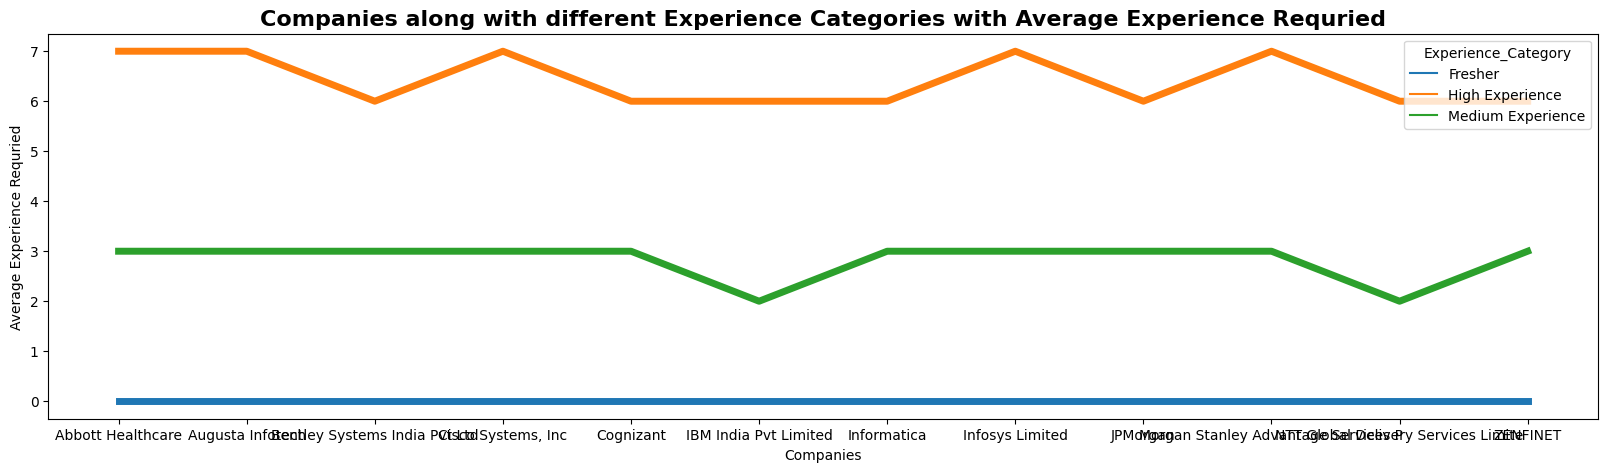

In [36]:
# Let's visualize these table using Line plot

# Set the size of the figure
fig = plt.subplots(figsize=(20, 5))

# Line Plot
ax = sns.lineplot(x = 'Company Name', y = 'Experience', data = company_experience, hue = 'Experience_Category', lw = 5)

# Set the theme of plot
sns.set_theme(style = 'darkgrid')

# Set axes and title label
plt.xlabel('Companies')
plt.ylabel('Average Experience Requried')
plt.title('Companies along with different Experience Categories with Average Experience Requried', fontweight = "bold", size = 16)

# Display plot
plt.show()

Experience_Category:

*   **Fresher** -> 0 years of experience,
*   **Medium Experience** -> 1-6 years of experience, and

*   **High Experience** -> more than 6 years of experience.

What is/are the insight(s) found from the chart?

*   From above analysis, candidates that come under the category of **'Medium Experience**' require atleast **2-3 years** of experience to get a job.
*   And candidates that come under '**High Experience**' category require atleast **6-7 years** of experience to get a job in a specific company.

*   Most of the times candidates that have 2-3 years of experience are selected for '**senior-level roles**' and those who have 6-7 years of experience are choosen for '**managerial-level roles**' in companies.










# **Conclusion**

In this project, we have performed **detail analysis on data science job market** to deliver insights that can assist companies and job seekers to understand the dynamic shifts of the industry. The project undertakes the following steps to gather information as follows:

*   ***Web Scraping***: In these step we start with sending request to the mentioned URL to get the HTML content and then we extract the necessary data through parsing the HTML like job title, location, companies, experience, vacancies, etc., and then we store the extracted data in a tabular format (dataframe).
*   ***Data Wrangling***: In these step we perform various data wrangling operations like removing duplicates, changing datatypes, adding new columns, finding unique values, etc.

*   ***Data Visualization***: Lastly, we have created numerous charts/graphs along with detail insights to acknowledge the data more efficiently.




